In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import pycountry as pc

In [2]:
def fmt(x):
    if x < 1:
        return f"{x:.2f}"
    return format(x, ".3g")

def get_iso3(name):
    try:
        return pc.countries.lookup(name).alpha_3
    except LookupError:
        return None

# Economy

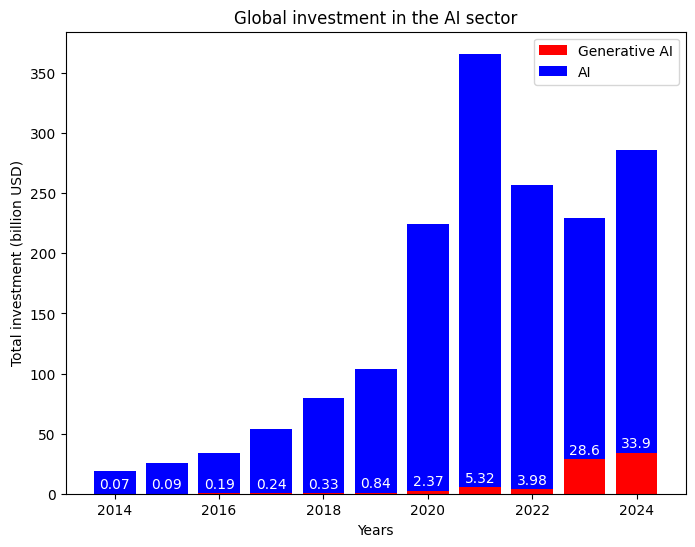

In [3]:
df1 = pd.read_csv("datasets/economy/data/fig-431.csv")
df2 = pd.read_csv("datasets/economy/data/fig-433.csv")

df1 = df1.rename(columns={df1.columns[0]: "year", df1.columns[1]: "type", df1.columns[2]: "amount"})
df2 = df2.rename(columns={df2.columns[0]: "year", df2.columns[1]: "amount"})

df1 = df1.drop(columns=["type"])

df1 = df1[df1["year"] >= 2014]
df2 = df2[df2["year"] >= 2014]
df1 = df1.groupby("year", as_index=False)["amount"].sum()

x = df1["year"].to_numpy()
y1 = df1["amount"].to_numpy()
y2 = df2["amount"].to_numpy()

fig, ax1 = plt.subplots(figsize=(8, 6))

ax1.bar(x, y2, color='r')
ax1.bar(x, y1, bottom=y2, color='b')
ax1.set_xlabel("Years")
ax1.set_ylabel("Total investment (billion USD)")

# Top bar text
for i in range(len(x)):
    ax1.text(x[i], y2[i] + 0.05 * max(y2), str(fmt(y2[i])), ha='center', va='bottom', color='w')

ax1.legend(["Generative AI", "AI"])
plt.title("Global investment in the AI sector")
plt.show()

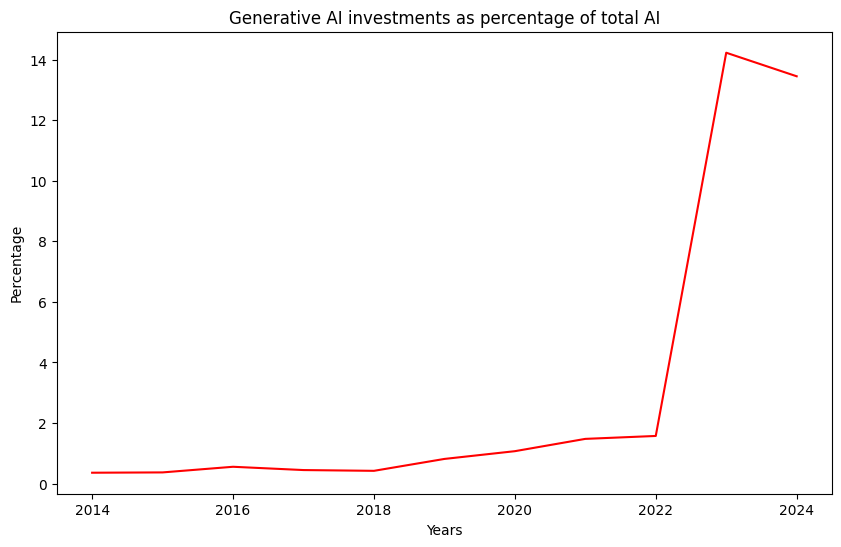

In [ ]:
df1 = pd.read_csv("datasets/economy/data/fig-431.csv")
df2 = pd.read_csv("datasets/economy/data/fig-433.csv")

df1 = df1.rename(columns={df1.columns[0]: "year", df1.columns[1]: "type", df1.columns[2]: "amount"})
df2 = df2.rename(columns={df2.columns[0]: "year", df2.columns[1]: "amount"})

df1 = df1.drop(columns=["type"])

df1 = df1[df1["year"] >= 2014]
df2 = df2[df2["year"] >= 2014]
df1 = df1.groupby("year", as_index=False)["amount"].sum()

x = df1["year"].to_numpy()
y = (df2["amount"] * 100) / df1["amount"]

fig, ax1 = plt.subplots(figsize=(8, 6))

ax1.plot(x, y, color='r')
ax1.set_xlabel("Years")
ax1.set_ylabel("Percentage")

plt.title("Generative AI investments as percentage of total AI")
plt.show()

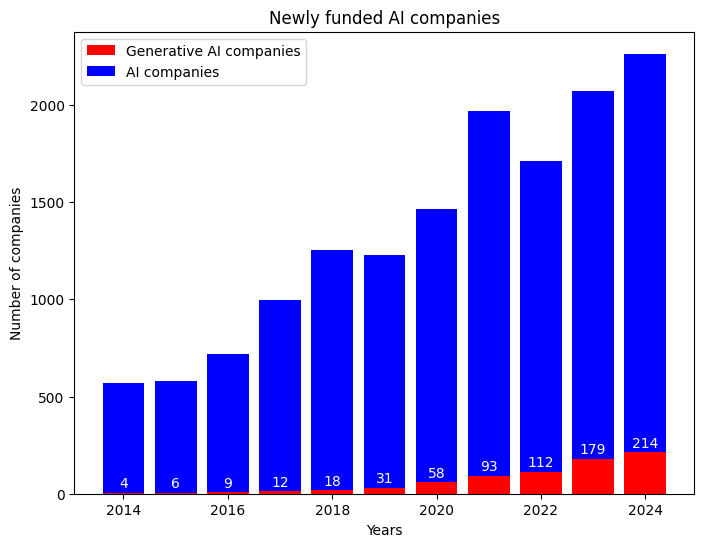

In [5]:
df1 = pd.read_csv("datasets/economy/data/fig-434.csv")
df2 = pd.read_csv("datasets/economy/data/fig-435.csv")

df1 = df1.rename(columns={df1.columns[0]: "year", df1.columns[1]: "number_of_companies"})
df2 = df2.rename(columns={df2.columns[0]: "year", df2.columns[1]: "number_of_companies"})

df1 = df1[df1["year"] >= 2014]
df2 = df2[df2["year"] >= 2014]

x = df1["year"].to_numpy()
y1 = df1["number_of_companies"].to_numpy()
y2 = df2["number_of_companies"].to_numpy()

fig, ax1 = plt.subplots(figsize=(8, 6))

ax1.bar(x, y2, color='r')
ax1.bar(x, y1, bottom=y2, color='b')
ax1.set_xlabel("Years")
ax1.set_ylabel("Number of companies")

# Top bar text
for i in range(len(x)):
    ax1.text(x[i], y2[i] + 0.05 * max(y2), str(fmt(y2[i])), ha='center', va='bottom', color='w')

ax1.legend(["Generative AI companies", "AI companies"])
plt.title("Newly funded AI companies")
plt.show()

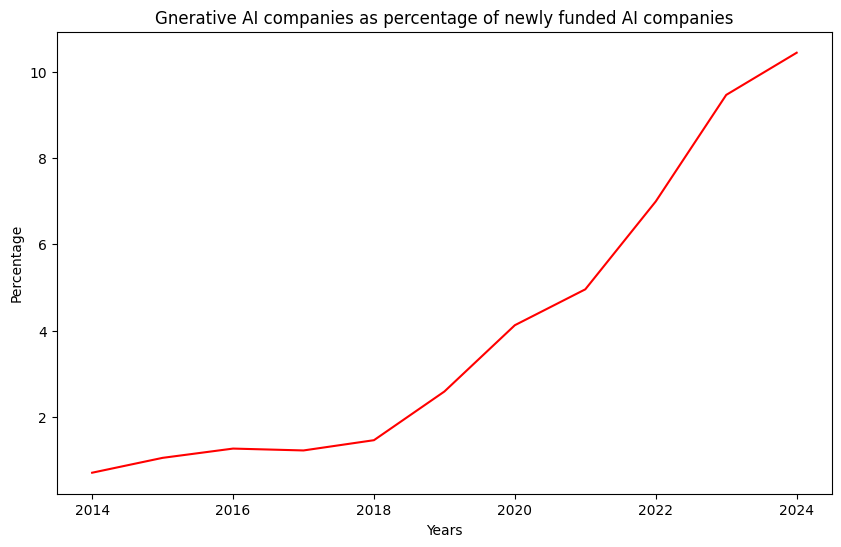

In [ ]:
df1 = pd.read_csv("datasets/economy/data/fig-434.csv")
df2 = pd.read_csv("datasets/economy/data/fig-435.csv")

df1 = df1.rename(columns={df1.columns[0]: "year", df1.columns[1]: "number_of_companies"})
df2 = df2.rename(columns={df2.columns[0]: "year", df2.columns[1]: "number_of_companies"})

df1 = df1[df1["year"] >= 2014]
df2 = df2[df2["year"] >= 2014]
df1 = df1.groupby("year", as_index=False)["number_of_companies"].sum()

x = df1["year"].to_numpy()
y = (df2["number_of_companies"] * 100) / df1["number_of_companies"]

fig, ax1 = plt.subplots(figsize=(8, 6))

ax1.plot(x, y, color='r')
ax1.set_xlabel("Years")
ax1.set_ylabel("Percentage")

plt.title("Gnerative AI companies as percentage of newly funded AI companies")
plt.show()

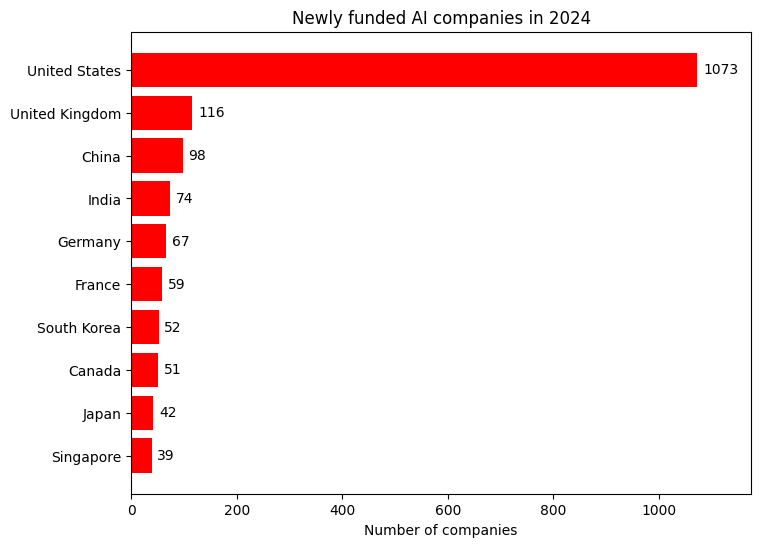

In [7]:
df = pd.read_csv("datasets/economy/data/fig-4312.csv")
df = df.rename(columns={df.columns[0]: "country", df.columns[1]: "number_of_companies"})

x = df["number_of_companies"][:10].to_numpy()
y = df["country"][:10].to_numpy()

x = np.flip(x)
y = np.flip(y)

fig, ax1 = plt.subplots(figsize=(8, 6))

ax1.barh(y, x, color='r')
ax1.set(xlim=(0, 1175))
ax1.set_xlabel("Number of companies")
#ax1.set_ylabel("Country")

# Top bar text
for i in range(len(y)):
    ax1.text(x[i] + 0.01 * max(x), y[i], str(x[i]), ha='left', va='center')

plt.title("Newly funded AI companies in 2024")
plt.show()

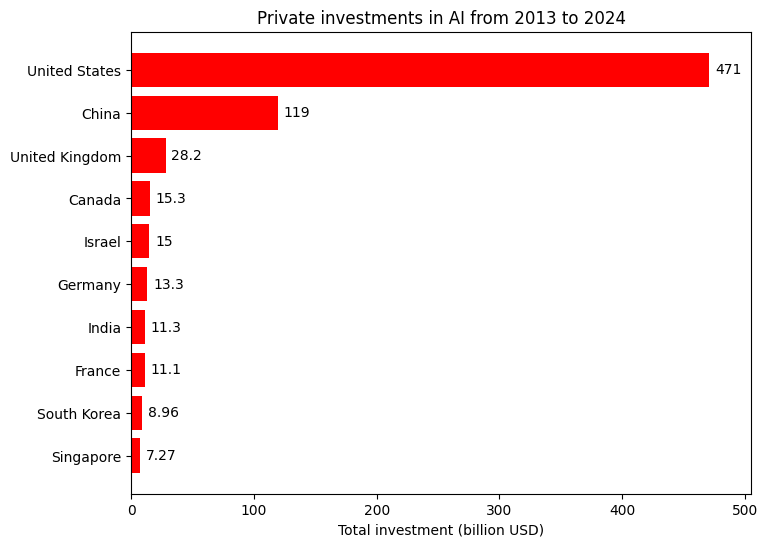

In [8]:
df = pd.read_csv("datasets/economy/data/fig-439.csv")
df = df.rename(columns={df.columns[0]: "country", df.columns[1]: "number_of_companies"})

x = df["number_of_companies"][:10].to_numpy()
y = df["country"][:10].to_numpy()

x = np.flip(x)
y = np.flip(y)

fig, ax1 = plt.subplots(figsize=(8, 6))

ax1.barh(y, x, color='r')
ax1.set(xlim=(0, 505))
ax1.set_xlabel("Total investment (billion USD)")
#ax1.set_ylabel("Country")

# Top bar text
for i in range(len(y)):
    ax1.text(x[i] + 0.01 * max(x), y[i], str(fmt(x[i])), ha='left', va='center')

plt.title("Private investments in AI from 2013 to 2024")
plt.show()

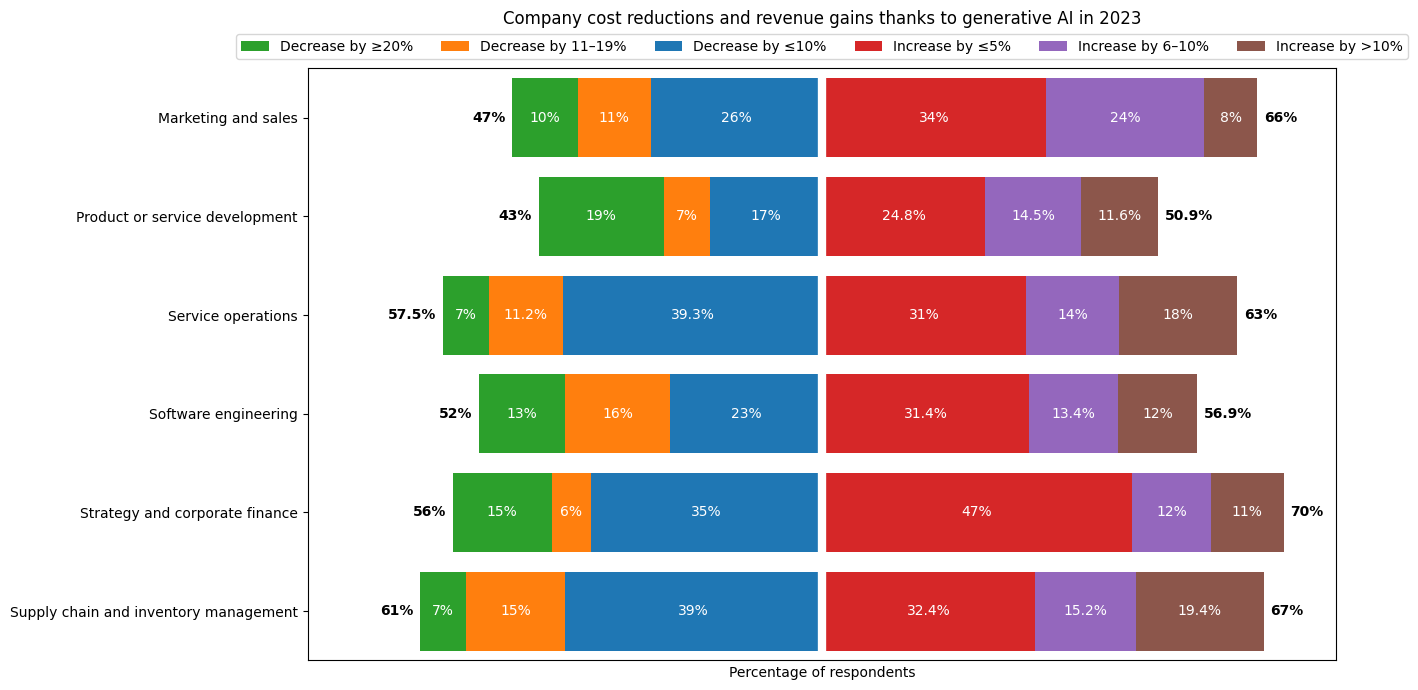

In [9]:
df = pd.read_csv("datasets/economy/data/fig-446.csv")
df["value"] = df["% of respondents"].str.replace("%", "").astype(float)
dec_cats = ["Decrease by ≤10%", "Decrease by 11–19%", "Decrease by ≥20%"]
inc_cats = ["Increase by ≤5%", "Increase by 6–10%", "Increase by >10%"]
dec = df[df["Category"].isin(dec_cats)]
inc = df[df["Category"].isin(inc_cats)]
dec_pivot = dec.pivot(index="Function", columns="Category", values="value").fillna(0)
inc_pivot = inc.pivot(index="Function", columns="Category", values="value").fillna(0)
# Reorder columns to match the order in dec_cats and inc_cats
dec_pivot = dec_pivot[dec_cats]
inc_pivot = inc_pivot[inc_cats]
functions = dec_pivot.index
dec_pivot = dec_pivot.loc[functions]
inc_pivot = inc_pivot.loc[functions]
functions = functions[::-1]
dec_pivot = dec_pivot.loc[functions]
inc_pivot = inc_pivot.loc[functions]
fig, ax = plt.subplots(figsize=(14, 7))
# Compute cumulative positions
dec_cum = dec_pivot.cumsum(axis=1)
inc_cum = inc_pivot.cumsum(axis=1)
# Negative direction for decreases
for col in dec_cats:
    widths = dec_pivot[col]
    starts = -(dec_cum[col] - widths)
    ax.barh(functions, -widths, left=starts, label=col)
    for i, (start, w) in enumerate(zip(starts, widths)):
        if w > 0:
            ax.text(start - w/2, functions[i], str(fmt(w)) + "%", ha="center", va="center", color="white")
# Add total percentage at the end of decrease bars
dec_totals = dec_pivot.sum(axis=1)
for i, (func, total) in enumerate(zip(functions, dec_totals)):
    if total > 0:
        ax.text(-total - 1, func, str(fmt(total)) + "%", ha="right", va="center", fontweight="bold")
# Positive direction for increases
for col in inc_cats:
    widths = inc_pivot[col]
    starts = (inc_cum[col] - widths)
    ax.barh(functions, widths, left=starts, label=col)
    for i, (start, w) in enumerate(zip(starts, widths)):
        if w > 0:
            ax.text(start + w/2, functions[i], str(fmt(w)) + "%", ha="center", va="center", color="white")
# Add total percentage at the end of increase bars
inc_totals = inc_pivot.sum(axis=1)
for i, (func, total) in enumerate(zip(functions, inc_totals)):
    if total > 0:
        ax.text(total + 1, func, str(fmt(total)) + "%", ha="left", va="center", fontweight="bold")

# Set ylimits to control bar spacing
ax.set_ylim(-0.5, len(functions) - 0.5)

# Draw white divider line stopping just before the edges
ax.plot([0, 0], [-0.4, len(functions) - 0.6], color="white", linewidth=6, zorder=10)

ax.set_xlabel("Percentage of respondents", x=0.5)
ax.set_xlim(-78, 78)
ax.set_xticks([])
ax.set_title("Company cost reductions and revenue gains thanks to generative AI in 2023", pad=32)
handles, labels = ax.get_legend_handles_labels()
handles = handles[2::-1] + handles[3:]
labels = labels[2::-1] + labels[3:]
ax.legend(handles, labels, ncol=6, loc="upper center", bbox_to_anchor=(0.5, 1.07))
plt.tight_layout()
plt.show()

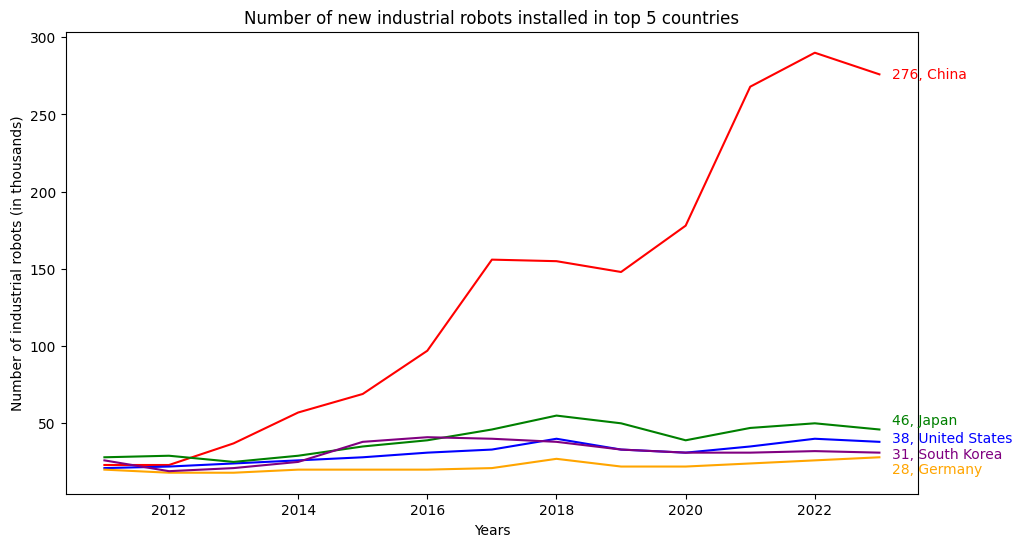

In [52]:
df = pd.read_csv("datasets/economy/data/fig-455.csv")

df = df.rename(columns={df.columns[0]: "year", df.columns[1]: "number_of_robots", df.columns[2]: "country"})

x = df["year"].unique()

fig, ax1 = plt.subplots(figsize=(11, 6))

offsets = {"China": 0, "United States": 2, "Japan": 6, "Germany": -8, "South Korea": -1}

for country, color in [("China", "red"), ("United States", "blue"), ("Japan", "green"),
                       ("Germany", "orange"), ("South Korea", "purple")]:
    sub = df[df["country"] == country]
    values = sub["number_of_robots"].to_numpy()

    ax1.plot(x, values, label=country, color=color)

    last_year = x[-1]
    last_value = values[-1]

    ax1.text(last_year + 0.2, last_value + offsets[country], f"{last_value}, {country}", va="center", ha="left", color=color)

ax1.set_xlabel("Years")
ax1.set_ylabel("Number of industrial robots (in thousands)")

plt.title("Number of new industrial robots installed in top 5 countries")
plt.show()

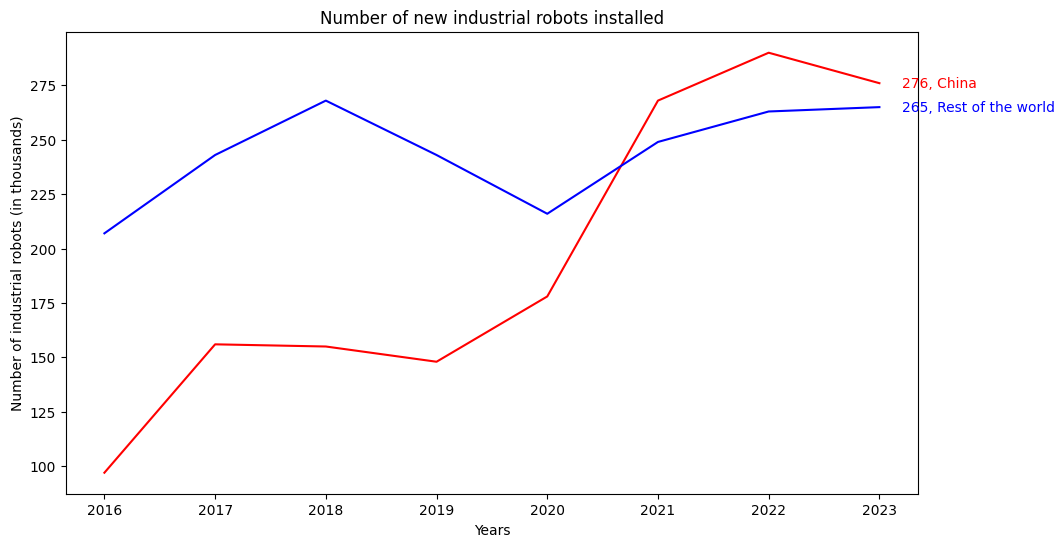

In [50]:
df = pd.read_csv("datasets/economy/data/fig-456.csv")

df = df.rename(columns={df.columns[0]: "year", df.columns[1]: "number_of_robots", df.columns[2]: "country"})

x = df["year"].unique()

fig, ax1 = plt.subplots(figsize=(11, 6))

offsets = {"China": 0, "Rest of the world": 0}

for country, color in [("China", "red"), ("Rest of the world", "blue")]:
    sub = df[df["country"] == country]
    values = sub["number_of_robots"].to_numpy()

    ax1.plot(x, values, label=country, color=color)

    last_year = x[-1]
    last_value = values[-1]

    ax1.text(last_year + 0.2, last_value + offsets[country], f"{last_value}, {country}", va="center", ha="left", color=color)

ax1.set_xlabel("Years")
ax1.set_ylabel("Number of industrial robots (in thousands)")

plt.title("Number of new industrial robots installed")
plt.show()

# Policy and Governance

In [85]:
df = pd.read_csv("datasets/policy-and-governance/data/fig-621.csv")
df = df.rename(columns={df.columns[0]: "country", df.columns[1]: "number_of_ai_bills"})
df["iso3"] = [get_iso3(name) for name in df["country"]]

# Create discrete bins matching the legend in the image
bins = [0, 1, 6, 11, 16, 31]  # 0, 1-5, 6-10, 11-15, 16-30
labels = ['0', '1–5', '6–10', '11–15', '16-30']
df['Legend'] = pd.cut(df['number_of_ai_bills'], bins=bins, labels=labels, right=False, include_lowest=True)

# Define colors matching the image (light to dark blue)
color_discrete_map = {
    '0': '#E8F4F8',
    '1–5': "#A4D8EF",
    '6–10': "#5EA6D3",
    '11–15': "#3374AD",
    '16-30': "#103F61"
}

fig = px.choropleth(
    df,
    locations="iso3",
    locationmode="ISO-3",
    color="Legend",
    color_discrete_map=color_discrete_map,
    category_orders={"Legend": labels},
    hover_name="country",
    hover_data={"number_of_ai_bills": True, "Legend": False, "iso3": False},
    title="Number of AI-related bills passed into law by country from 2016 to 2024"
)

fig.show()

[ 7  9 10 10 11 13 18 20 20 27]
['Austria' 'France' 'United Kingdom' 'Italy' 'Spain' 'South Korea'
 'Belgium' 'Russia' 'Portugal' 'United States']


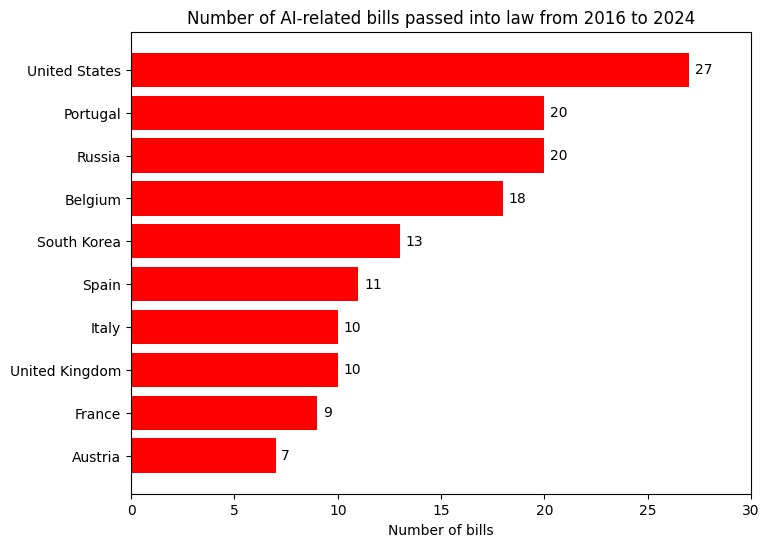

In [102]:
df = pd.read_csv("datasets/policy-and-governance/data/fig-624.csv")
df = df.rename(columns={df.columns[0]: "number_of_bills", df.columns[1]: "country"})

x = df["number_of_bills"][:10].to_numpy()
y = df["country"][:10].to_numpy()

x = np.flip(x)
y = np.flip(y)

print(x)
print(y)

fig, ax1 = plt.subplots(figsize=(8, 6))

ax1.barh(y, x, color='r')
ax1.set(xlim=(0, 30))
ax1.set_xlabel("Number of bills")
#ax1.set_ylabel("Country")

# Top bar text
for i in range(len(y)):
    ax1.text(x[i] + 0.01 * max(x), y[i], str(fmt(x[i])), ha='left', va='center')

plt.title("Number of AI-related bills passed into law from 2016 to 2024")
plt.show()

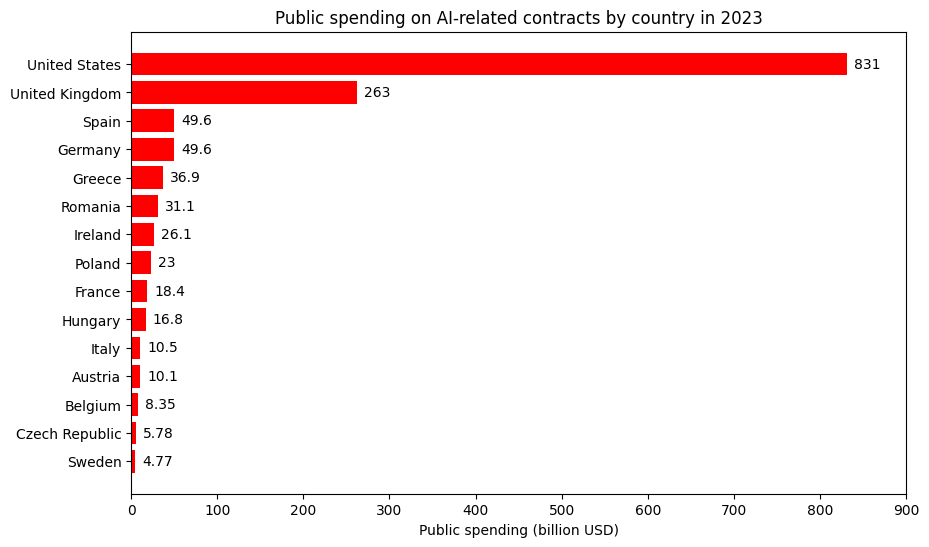

In [119]:
df = pd.read_csv("datasets/policy-and-governance/data/fig-635.csv")
df = df.rename(columns={df.columns[0]: "publis_spending", df.columns[1]: "country"})

x = df["publis_spending"][:15].to_numpy()
y = df["country"][:15].to_numpy()

x = np.flip(x)
y = np.flip(y)

fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.barh(y, x, color='r')
ax1.set(xlim=(0, 900))
ax1.set_xlabel("Public spending (billion USD)")
#ax1.set_ylabel("Country")

# Top bar text
for i in range(len(y)):
    ax1.text(x[i] + 0.01 * max(x), y[i], str(fmt(x[i])), ha='left', va='center')

plt.title("Public spending on AI-related contracts by country in 2023")
plt.show()

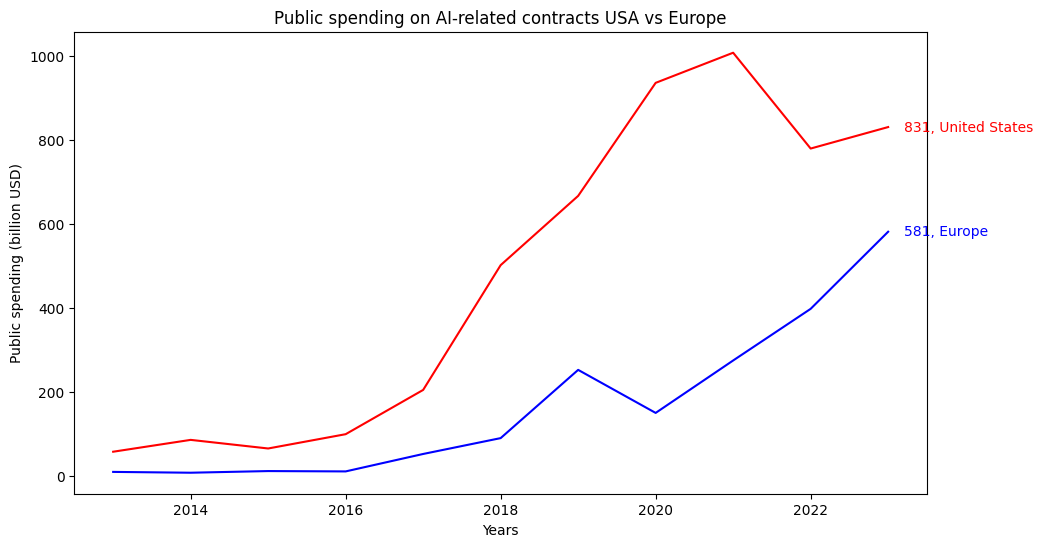

In [121]:
df = pd.read_csv("datasets/policy-and-governance/data/fig-636.csv")

df = df.rename(columns={df.columns[0]: "year", df.columns[1]: "number_of_robots", df.columns[2]: "country"})

x = df["year"].unique()

fig, ax1 = plt.subplots(figsize=(11, 6))

offsets = {"United States": 0, "Europe": 0}

for country, color in [("United States", "red"), ("Europe", "blue")]:
    sub = df[df["country"] == country]
    values = sub["number_of_robots"].to_numpy()

    ax1.plot(x, values, label=country, color=color)

    last_year = x[-1]
    last_value = values[-1]

    ax1.text(last_year + 0.2, last_value + offsets[country], f"{fmt(last_value)}, {country}", va="center", ha="left", color=color)

ax1.set_xlabel("Years")
ax1.set_ylabel("Public spending (billion USD)")

plt.title("Public spending on AI-related contracts USA vs Europe")
plt.show()